## Keypoint Detection
---
There are 10 images given in the ***img*** folder. Your task is to detect ***200*** keypoints for each of them using detectors.

Below are the tutorials about SIFT and Harris corners:

SIFT: https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

Harris corners: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners

Let's take a look at these images first!

---

In [1]:
# load packages
import cv2
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

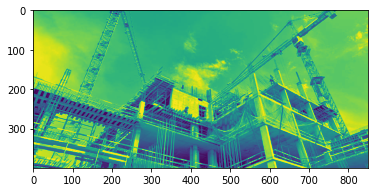

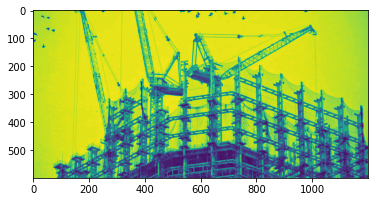

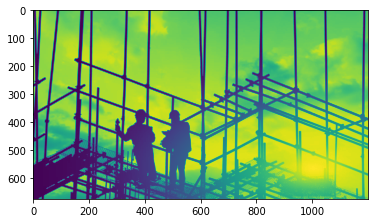

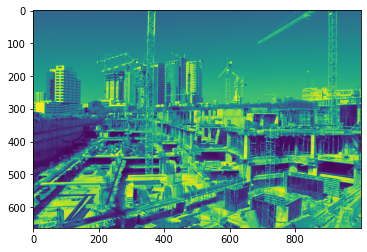

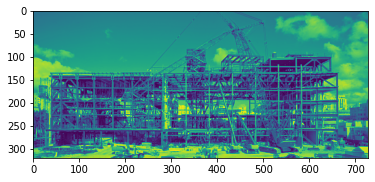

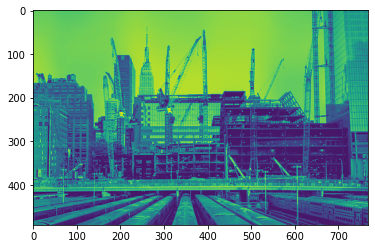

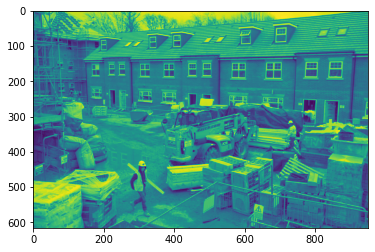

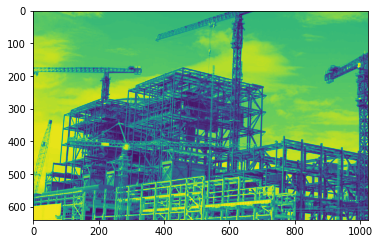

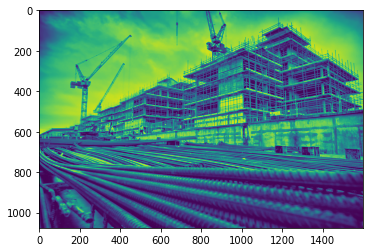

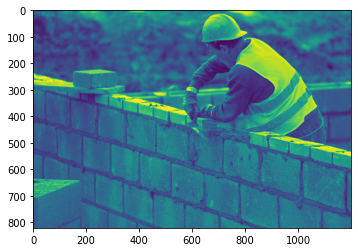

In [2]:
img_dir = "img"
if os.path.exists(img_dir):
    if os.listdir(img_dir) is []:
        print("No images!")
        exit(0)
    num_img = len(os.listdir(img_dir))
    for img in os.listdir(img_dir):
        if not img.endswith("jpg"):
            continue
        image_dir = os.path.join(img_dir, img)
        image = cv2.imread(image_dir)
        gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        plt.show()
else:
    print("image folder not exists!")
    exit(0)

### The Keypoints:
The output of this part is a list of keypoints that represented by the x and y cooridnates.

For example, the 10 points of image ***3.jpg*** are:

In [3]:

keypoints = list([(10.0, 10),  (16.0, 15.5), (15, 16), (1585, 16), (15, 1024), (100, 106), (150, 160), (715, 716), (315, 916), (815, 640)])

Then we can obtain the patches with these keypoints:


In [4]:
def getPatches(kps, img, size=32, num=500):
    res = torch.zeros(num, 1, size, size)
    if type(img) is np.ndarray:
        img = torch.from_numpy(img)
    h, w = img.shape      # note: for image, the x direction is the verticle, y-direction is the horizontal...
    for i in range(num):
        cx, cy = kps[i]
        cx, cy = int(cx), int(cy)
        dd = int(size/2)
        xmin, xmax = max(0, cx - dd), min(w, cx + dd ) 
        ymin, ymax = max(0, cy - dd), min(h, cy + dd ) 
        
        xmin_res, xmax_res = dd - min(dd,cx), dd + min(dd, w - cx)
        ymin_res, ymax_res = dd - min(dd,cy), dd + min(dd, h - cy)

        cropped_img = img[ymin: ymax, xmin: xmax]
        ch, cw = cropped_img.shape
        res[i, 0, ymin_res: ymin_res+ch, xmin_res: xmin_res+cw] =  cropped_img
        
    return res

### Let's plot these patches

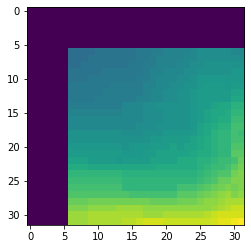

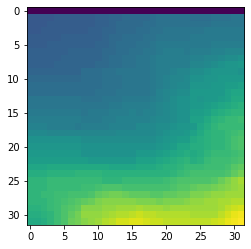

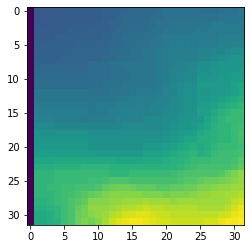

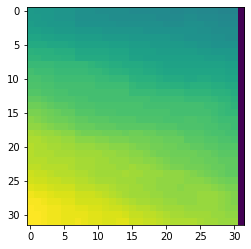

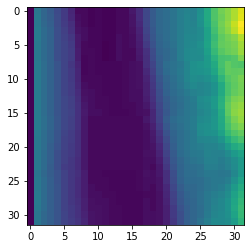

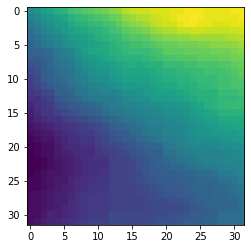

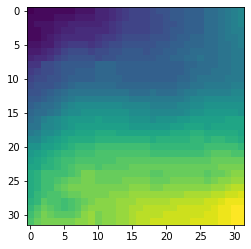

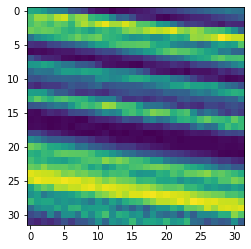

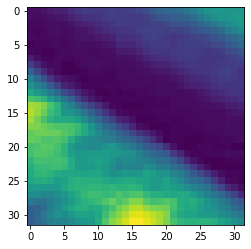

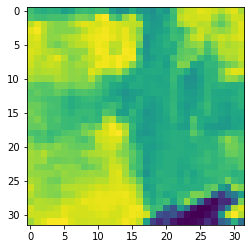

In [5]:
img = cv2.imread('img/3.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# gray = img[:, :, 0]
patches = getPatches(keypoints, gray,size=32, num=10)
for patch in patches:
    im = patch[0].numpy()
    plt.imshow(im)
    plt.show()


### Save the patches with PyTorch
For each image, you can output the patches within one tensor. In above examples, tensor ***patches*** is the one that you should store in a list. And then save the list as a "SIFT.pth" file:

In [6]:
all_patches = []
all_patches.append(patches)
all_patches = torch.stack(all_patches, dim=0)
output_dir = "patches.pth"         # modify it to SIFT.pth or Harris.pth
torch.save(all_patches, output_dir)

### Test with your saved patches

In [7]:
test_patches = torch.load(output_dir)
print(type(test_patches))
print(test_patches.shape)
# your tensor for each should have size of [10, 200, 1, 32, 32];where 10 means 10 images (in the order 1-10), 200 means 200 points.

<class 'torch.Tensor'>
torch.Size([1, 10, 1, 32, 32])
